Tasks:
Understanding the Dataset:
Load the ex7data2.mat dataset using the scipy.io.loadmat function.
Visualize the data points in the dataset using a scatter plot.

Finding Closest Centroids:
Implement the find_closest_centroids function that assigns each data point to the closest centroid.
Use Euclidean distance to measure the closeness between data points and centroids.
Test the function by assigning the initial centroids as np.array([[3, 3], [6, 2], [8, 5]]) and printing out the index of the closest centroid for the first three data points.

Computing Centroids:
Implement the compute_centroids function that computes the mean of all data points assigned to each centroid, effectively moving the centroid to the center of its assigned data points.
Test the function by computing and printing new centroid locations.

Running K-means:
Implement the run_k_means function that iteratively runs the find_closest_centroids and compute_centroids functions for a given number of iterations (max_iters).
Test the function with 10 iterations and visualize the resulting clusters with different colors on a scatter plot. Also, plot the final centroid locations.

Initializing Centroids:
Implement the init_centroids function that selects random data points from the dataset to serve as the initial centroids.
Test the function by initializing centroids for three clusters and printing them out.



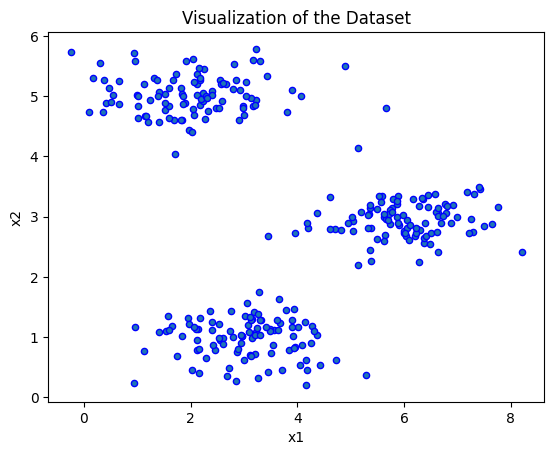

Closest centroids for the first 3 examples:
 [[0.]
 [2.]
 [1.]]
Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


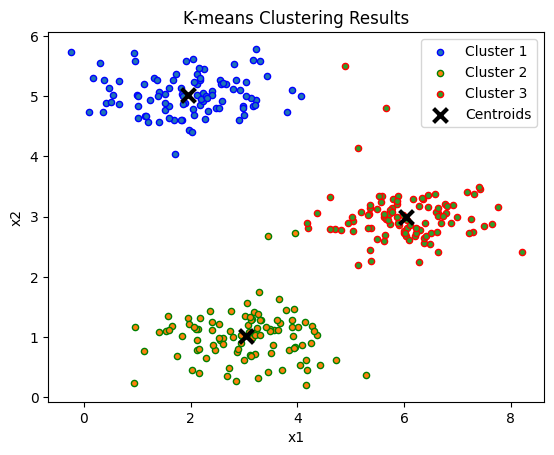

Randomly initialized centroids:
 [[1.15354031 4.67866717]
 [5.74036233 3.10391306]
 [4.20584789 2.81647368]]


In [2]:
# prompt: understanding the dataset load the ex7data2.mat

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the dataset
data = loadmat('ex7data2.mat')
X = data['X']

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], marker='o', s=20, linewidths=1, edgecolors='b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Visualization of the Dataset')
plt.show()


def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
        distances = np.sum((X[i] - centroids) ** 2, axis=1)
        idx[i] = np.argmin(distances)
    return idx


# Test find_closest_centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n", idx[:3])

def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx.flatten() == k]
        centroids[k] = np.mean(points, axis=0)
    return centroids

# Test compute_centroids
K = 3
centroids = compute_centroids(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))

    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)

    return centroids, idx

# Test run_k_means
max_iters = 10
centroids, idx = run_k_means(X, initial_centroids, max_iters)

# Visualize the results
cluster1 = X[np.where(idx == 0)[0], :]
cluster2 = X[np.where(idx == 1)[0], :]
cluster3 = X[np.where(idx == 2)[0], :]

plt.scatter(cluster1[:, 0], cluster1[:, 1], marker='o', s=20, linewidths=1, edgecolors='b', label='Cluster 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], marker='o', s=20, linewidths=1, edgecolors='g', label='Cluster 2')
plt.scatter(cluster3[:, 0], cluster3[:, 1], marker='o', s=20, linewidths=1, edgecolors='r', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=3, color='black', label='Centroids')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()


def init_centroids(X, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    rand_indices = np.random.randint(0, m, K)
    for i in range(K):
        centroids[i, :] = X[rand_indices[i], :]
    return centroids

# Test init_centroids
K = 3
centroids = init_centroids(X, K)
print("Randomly initialized centroids:\n", centroids)
